<a href="https://colab.research.google.com/github/ThoaaPhann/Fuzzy_logic_homework/blob/main/Fuzzy_logic_Rainfall_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Fuzzy model for rainfall event prediction

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=be368792fbf5513e92be2e1a7a7e10e3dcfebf0f2cf144f901f2251a713402d6
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

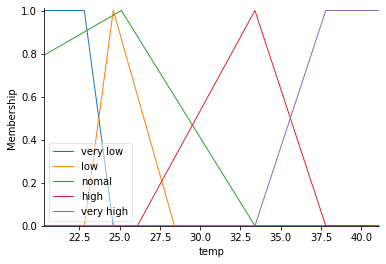

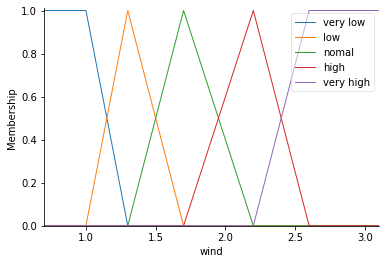

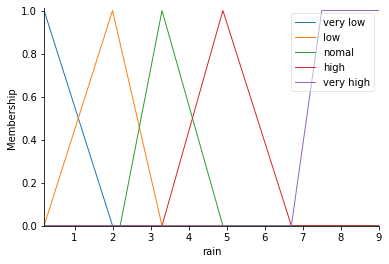

In [8]:
#Define domain
temp = ctrl.Antecedent(np.arange(20.3,41.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,3.1,0.1),'wind')
rain  = ctrl.Antecedent(np.arange(0.2,9.1,0.1),'rain')
prediction  = ctrl.Consequent(np.arange(0,42,1),'prediction')

temp ['very low'] = fuzz.trapmf(temp.universe,[20.3,20.3,22.8,24.6])
temp ['low'] = fuzz.trimf(temp.universe,[22.8,24.6,28.4])
temp ['nomal'] = fuzz.trimf(temp.universe,[2,25.1,33.4])
temp ['high'] = fuzz.trimf(temp.universe,[26.1,33.4,37.8])
temp ['very high'] = fuzz.trapmf(temp.universe,[33.4,37.8,41.2,41.2])

wind ['very low'] = fuzz.trapmf(wind.universe,[0.7,0.7,1,1.3])
wind ['low'] = fuzz.trimf(wind.universe,[1,1.3,1.7])
wind ['nomal'] = fuzz.trimf(wind.universe,[1.3,1.7,2.2])
wind ['high'] = fuzz.trimf(wind.universe,[1.7,2.2,2.6])
wind ['very high'] = fuzz.trapmf(wind.universe,[2.2,2.6,3.1,3.1])

rain ['very low'] = fuzz.trapmf(rain.universe,[0,0,0.2,2])
rain ['low'] = fuzz.trimf(rain.universe,[0.2,2,3.3])
rain ['nomal'] = fuzz.trimf(rain.universe,[2.2,3.3,4.9])
rain ['high'] = fuzz.trimf(rain.universe,[3.3,4.9,6.7])
rain ['very high'] = fuzz.trapmf(rain.universe,[6.7,7.5,9.1,9.1])

prediction ['very low'] = fuzz.trimf(prediction.universe,[0,5,10])
prediction ['low'] = fuzz.trimf(prediction.universe,[5,10,18])
prediction ['nomal'] = fuzz.trimf(prediction.universe,[18,23,30])
prediction ['high'] = fuzz.trimf(prediction.universe,[23,30,35])
prediction ['very high'] = fuzz.trimf(prediction.universe,[30,35,42])

#Rule 
rule1 = ctrl.Rule(temp['very low']&wind['very low']&rain['very low'],prediction ['very low'])
rule2 = ctrl.Rule(temp['very low']&wind['low']&rain['low'],prediction ['low'])
rule3 = ctrl.Rule(temp['very low']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule4 = ctrl.Rule(temp['very low']&wind['high']&rain['high'],prediction ['nomal'])
rule5 = ctrl.Rule(temp['very low']&wind['very high']&rain['very high'],prediction ['high'])

rule6 = ctrl.Rule(temp['low']&wind['very low']&rain['very low'],prediction ['low'])
rule7 = ctrl.Rule(temp['low']&wind['low']&rain['low'],prediction ['very low'])
rule8 = ctrl.Rule(temp['low']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule9 = ctrl.Rule(temp['low']&wind['high']&rain['high'],prediction ['nomal'])
rule10 = ctrl.Rule(temp['low']&wind['very high']&rain['very high'],prediction ['high'])

rule11 = ctrl.Rule(temp['nomal']&wind['very low']&rain['very low'],prediction ['nomal'])
rule12 = ctrl.Rule(temp['nomal']&wind['low']&rain['low'],prediction ['nomal'])
rule13 = ctrl.Rule(temp['nomal']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule14 = ctrl.Rule(temp['nomal']&wind['high']&rain['high'],prediction ['high'])
rule15 = ctrl.Rule(temp['nomal']&wind['very high']&rain['very high'],prediction ['high'])

rule16 = ctrl.Rule(temp['high']&wind['very low']&rain['very low'],prediction ['nomal'])
rule17 = ctrl.Rule(temp['high']&wind['low']&rain['low'],prediction ['nomal'])
rule18 = ctrl.Rule(temp['high']&wind['nomal']&rain['nomal'],prediction ['high'])
rule19 = ctrl.Rule(temp['high']&wind['high']&rain['high'],prediction ['high'])
rule20 = ctrl.Rule(temp['high']&wind['very high']&rain['very high'],prediction ['very high'])

rule21 = ctrl.Rule(temp['very high']&wind['very low']&rain['very low'],prediction ['high'])
rule22 = ctrl.Rule(temp['very high']&wind['low']&rain['low'],prediction ['high'])
rule23 = ctrl.Rule(temp['very high']&wind['nomal']&rain['nomal'],prediction ['high'])
rule24 = ctrl.Rule(temp['very high']&wind['high']&rain['high'],prediction ['very high'])
rule25 = ctrl.Rule(temp['very high']&wind['very high']&rain['very high'],prediction ['very high'])

temp.view()
wind.view()
rain.view()

29.020310633213853


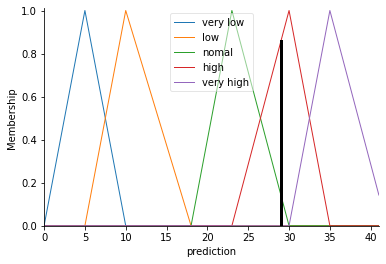

In [9]:
predictioning_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule21,rule22,rule23,rule24,rule25])
predictioning = ctrl.ControlSystemSimulation(predictioning_ctrl)
predictioning.input['temp'] = 25
predictioning.input['wind'] = 2.2
predictioning.input['rain'] = 7

predictioning.compute()
print(predictioning.output['prediction'])
prediction.view(sim = predictioning)